<a href="https://colab.research.google.com/github/kaishra/AFAME-PROJECT/blob/main/titanic_survival_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#Titanic survival
import numpy as np
import pandas as pd


In [63]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
print("******Dataset Information****** \n",df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
******Dataset Information****** 
 None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0 

In [64]:
#Removing features that are not relevant
df.drop(['Name','Ticket','Cabin'],inplace=True,axis=1)
print(df.info())
df.isnull().sum()
df.Embarked.value_counts()
data = [df]
for dataset in data:
  dataset.Embarked = dataset.Embarked.fillna('S')
df.Fare.value_counts()
df.Age.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None


Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [65]:
#null fix
data=[df]
for dataset in data:
  dataset.Fare = dataset.Fare.fillna(dataset.Fare.mean())
  dataset.Age = dataset.Age.fillna(dataset.Age.mean())
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None


In [66]:
df[['Age','Survived']].groupby(['Age'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
80,63.00,1.0
69,53.00,1.0
1,0.67,1.0
...,...,...
50,36.50,0.0
32,24.50,0.0
47,34.50,0.0
41,30.50,0.0


In [67]:
tempFare = df.Fare
tempFare = pd.qcut(tempFare,5)
tempFare.value_counts()

data = [df]
for dataset in data:
  dataset.loc[(dataset['Fare']<=7.854),'Fare']=0
  dataset.loc[(dataset['Fare']>=7.854) & (dataset['Fare']<=10.5) ,'Fare']=1
  dataset.loc[(dataset['Fare']>=10.5) & (dataset['Fare']<=21.679) ,'Fare']=2
  dataset.loc[(dataset['Fare']>=21.679) & (dataset['Fare']<=39.688) ,'Fare']=3
  dataset.loc[(dataset['Fare']>=39.688) ,'Fare']=4
  dataset.Fare = dataset['Fare'].astype(int)
df.Fare.value_counts()


tempAge = df.Age
tempAge = pd.qcut(tempAge,5)
tempAge.value_counts()


data = [df]
for dataset in data:
  dataset.loc[(dataset['Age']<=20.0),'Age']=0
  dataset.loc[(dataset['Age']>=20.0) & (dataset['Age']<=28.0) ,'Age']=1
  dataset.loc[(dataset['Age']>=28.0) & (dataset['Age']<=29.699) ,'Age']=2
  dataset.loc[(dataset['Age']>=29.699) & (dataset['Age']<=38.0) ,'Age']=3
  dataset.loc[(dataset['Age']>=38.0) ,'Age']=4
  dataset.Age = dataset['Age'].astype(int)
df.Age.value_counts()

Age
3    330
1    183
0    179
4    177
2     22
Name: count, dtype: int64

In [68]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    object
 4   Age          891 non-null    int64 
 5   SibSp        891 non-null    int64 
 6   Parch        891 non-null    int64 
 7   Fare         891 non-null    int64 
 8   Embarked     891 non-null    object
dtypes: int64(7), object(2)
memory usage: 62.8+ KB
None


In [69]:
#obj to int/float type (Sex,Embark)
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())

genderMap = {"male":0,"female":1}
embarkedMap = {"S":0,"C":1,"Q":2}
data=[df]
for dataset in data:
  dataset['Sex']=dataset['Sex'].map(genderMap)
  dataset['Embarked']=dataset['Embarked'].map(embarkedMap)
print(df)


Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0              1         0       3    0    1      1      0     0         0
1              2         1       1    1    3      1      0     4         1
2              3         1       3    1    1      0      0     1         0
3              4         1       1    1    3      1      0     4         0
4              5         0       3    0    3      0      0     1         0
..           ...       ...     ...  ...  ...    ...    ...   ...       ...
886          887         0       2    0    1      0      0     2         0
887          888         1       1    1    0      0      0     3         0
888          889         0       3    1    3      1      2     3         0
889          890         1       1    0    1      0      0     3         1
890          891         0       3    0    3      0    

In [70]:

# Define features and target variable
X = df.drop(['Survived'], axis=1)
y = df['Survived']
from sklearn.model_selection import train_test_split
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_val)
acc_logistic = round(accuracy_score(y_val, y_pred_lr)*100,2)
print(acc_logistic)


80.45


In [72]:
#SVM
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train,y_train)
y_pred_lr = clf_svm.predict(X_val)
acc_svm = round(accuracy_score(y_val,y_pred_lr)*100,2)
print(acc_svm)

58.66


In [73]:
#Gaussian Naive bayes
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
y_pred_lr = clf_gnb.predict(X_val)
acc_gnb = round(accuracy_score(y_val,y_pred_lr)*100,2)
print(acc_gnb)

77.65


In [74]:
#Using the best model to Y_pred
Y_pred = clf_lr.predict(X_val)
result = pd.DataFrame({'PassengerId':X_val.index,'Survived':Y_pred})
print(result)

     PassengerId  Survived
0            709         0
1            439         0
2            840         0
3            720         1
4             39         1
..           ...       ...
174          433         0
175          773         0
176           25         0
177           84         1
178           10         1

[179 rows x 2 columns]


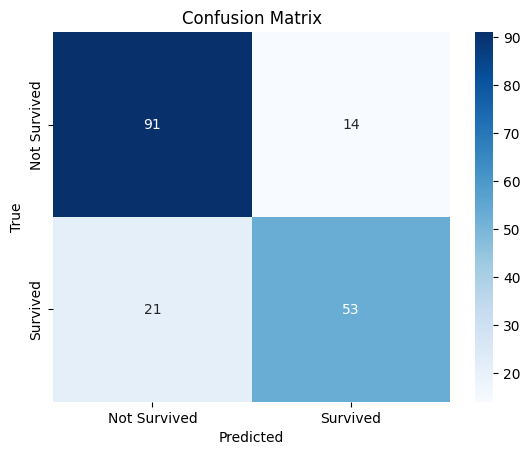

In [75]:
#Visualizations to understand the results
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
#confusion matrix
cm = confusion_matrix(y_val,Y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Not Survived','Survived'],yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




In [76]:

# Create a DataFrame for accuracies
accuracies = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes'],
    'Accuracy': [acc_logistic, acc_svm, acc_gnb]
})

print("Accuracies:")
print(accuracies)



Accuracies:
                 Model  Accuracy
0  Logistic Regression     80.45
1                  SVM     58.66
2          Naive Bayes     77.65
